#### [산점도 그래프]
- 2개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형) 데이터에 사용함

In [1]:
# 모듈로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 데이터 준비
file_path = r'C:\Users\KDP-43\Desktop\KDT_Pandas\과제\DATA\auto_mpg.csv'
dataDF = pd.read_csv(file_path)

In [3]:
# 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [4]:
# 연비와 관련 높은 컬럼 (변수) 확인
# [4_1] 칼럼간 상관계수 확인

# 수치형 데이터에 대해서만 상관계수 도출
dataDF.corr(numeric_only=True)


,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [5]:
# mgp와 다른 변수 간 상관계수
dataDF.corr(numeric_only=True)['mpg']

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

In [ ]:
corrSR = dataDF.corr(numeric_only=True)['mpg']
corrSR['weight']

###### weight 변수가 연비 칼럼과 높은 상관계수를 가짐

In [ ]:
# [4_2] 시각화
plt.scatter(dataDF.mpg, dataDF.weight, label = f'corr: {round(corrSR["weight"], 2)}')

plt.xlabel("mpg")
plt.ylabel("weight")
plt.legend(fontsize=12)

plt.show()

##### [4_3] mpg & 다른 컬럼 간의 상관 관계 시각화

In [ ]:
# mgp와 다른 변수 간 상관계수
dataDF.corr(numeric_only=True)['mpg']

C:\Users\KDP-43\AppData\Local\Temp\ipykernel_27508\35364452.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[idx-1].scatter(dataDF['mpg'], dataDF[corrSR.index[idx]], label = f'corr: {round(corrSR[idx], 2)}')


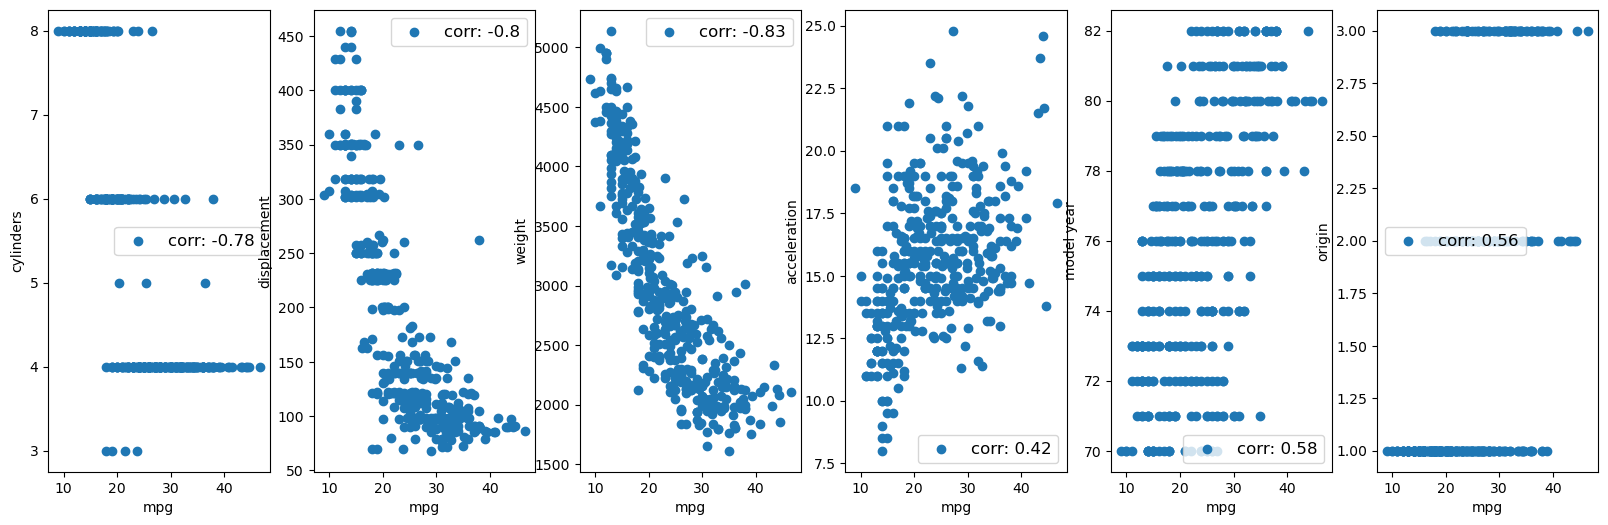

In [59]:
# my Ver.
# axes = fig.subplots(1,6)

fig = plt.figure( figsize=(20,6))

axes = fig.subplots(1,6)

for idx in range(1,7):
    axes[idx-1].scatter(dataDF['mpg'], dataDF[corrSR.index[idx]], label = f'corr: {round(corrSR[idx], 2)}')

    axes[idx-1].set_xlabel("mpg")
    axes[idx-1].set_ylabel(corrSR.index[idx])
    axes[idx-1].legend(fontsize=12)
    
plt.show()

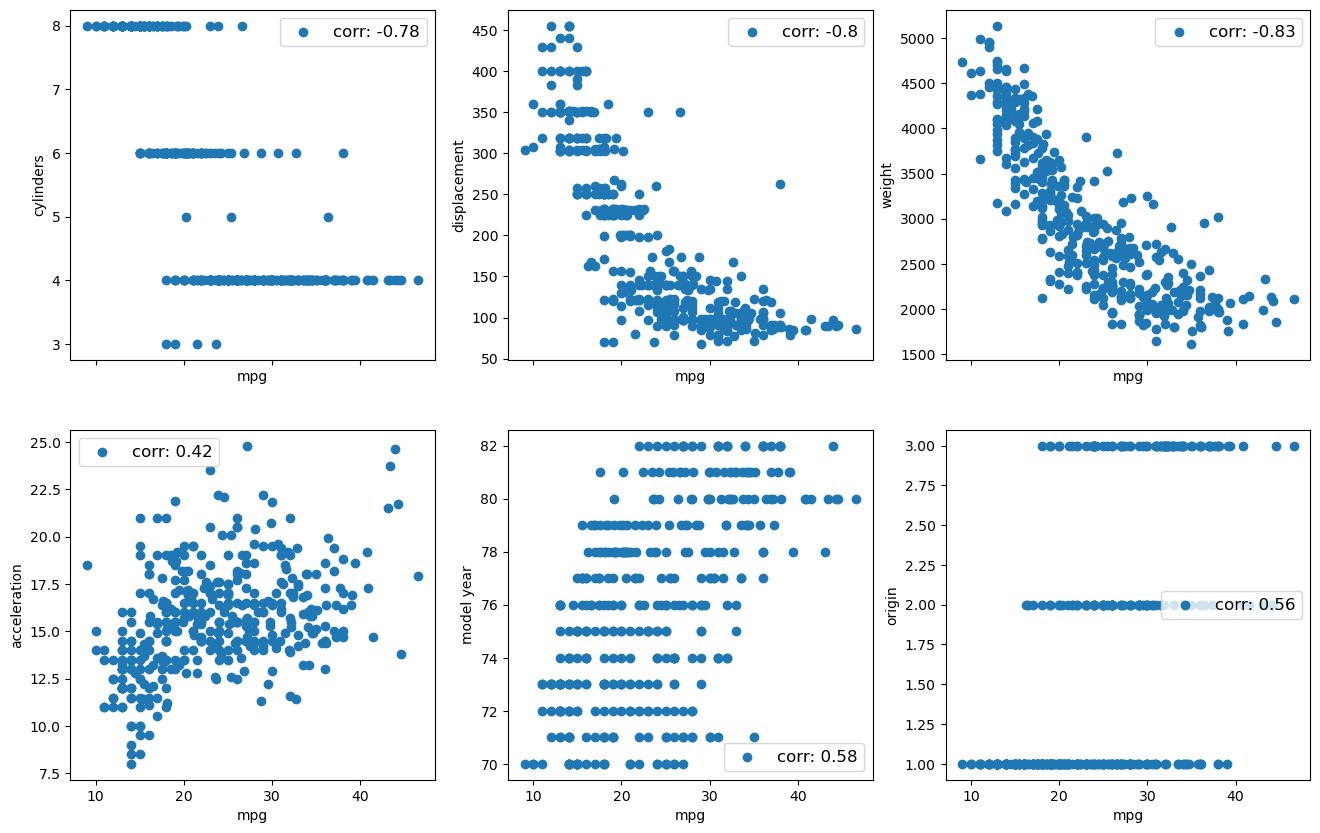

In [60]:

fig = plt.figure( figsize=(16,10))

# 그래프 담을 공간 생성
axes = fig.subplots(2,3, sharex=True)

for row in range(2):
    for col in range(3):
        col_name = corrSR.index[row*3+col+1]
        axes[row,col].scatter(dataDF['mpg'], dataDF[col_name], label = f'corr: {round(corrSR[col_name], 2)}')

        axes[row,col].set_xlabel("mpg")
        axes[row,col].set_ylabel(corrSR.index[row*3+col+1])
        axes[row,col].legend(fontsize=12)
    

#### bubble chart
           * 연비와 무게, 실린더 관계 시각화
           * 실린더 칼럼 값으로 bubble size로 
<br><br>
* 연비와 무게 반비례 관게, 상관관계가 높음
* 연비와 실린더 개수 반비례 관계
* 같은 무게의 자동차여도 실린더는 서로 다를 수 있음
* 연비가 좋을수록 무게가 작지만, 실린더 산포도를 보면 실린더 개수가 많아도 연비가 낮은(좋은) 분포도 확인됨

In [6]:
# mpg & weight 관계 scatter 시각화

dataDF.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [7]:
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [8]:
# 한글패치
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

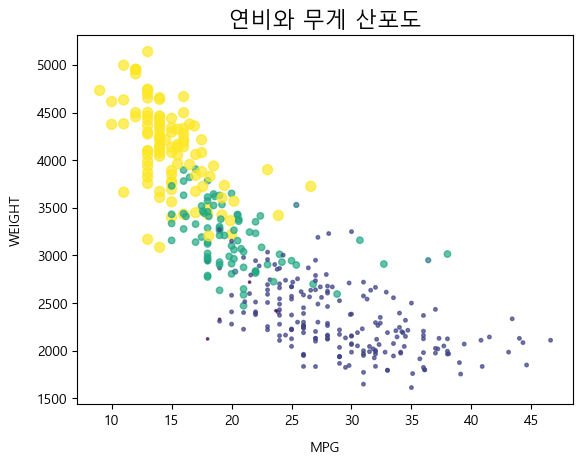

In [33]:
# scatter plot
plt.scatter(dataDF["mpg"], dataDF["weight"], 
            s = dataDF["cylinders"]**3*0.1,
            c=dataDF["cylinders"],           ## 실린더 칼럼 값에 따라 marker 색 다르게 설정
            alpha=0.7)              

plt.title("연비와 무게 산포도", fontsize=16)
plt.xlabel("MPG", labelpad=10)
plt.ylabel("WEIGHT", labelpad=10)

plt.show()

TypeError: cannot unpack non-iterable PathCollection object

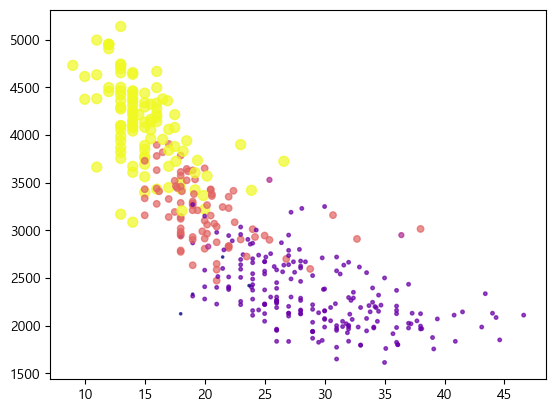

In [49]:
# scatter plot
# colormap 지정

tmp, _, _ = plt.scatter(dataDF["mpg"], dataDF["weight"], 
            s = dataDF["cylinders"]**3*0.1,
            c=dataDF["cylinders"],
            cmap='plasma',          
            alpha=0.70)

plt.title("연비와 무게 산포도", fontsize=16)
plt.xlabel("MPG", labelpad=10)
plt.ylabel("WEIGHT", labelpad=10)

plt.show()

In [41]:
dataDF["cylinders"].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

##### 질문) 각 색에 대한 라벨 지정

In [ ]:
# scatter plot
# colormap 지정

tmp, _, _ = plt.scatter(dataDF["mpg"], dataDF["weight"], 
            s = dataDF["cylinders"]**3*0.1,
            c=dataDF["cylinders"],
            cmap='plasma',          
            alpha=0.70)

# how??) cylinder.unique() 값에 따른 색에 대한 라벨 지정 

# 
# wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
#                                   textprops=dict(color="w"))

# ax.legend(wedges, ingredients,
#           title="Ingredients",
#           loc="center left",
#           bbox_to_anchor=(1, 0, 0.5, 1))
                          

plt.title("연비와 무게 산포도", fontsize=16)
plt.xlabel("MPG", labelpad=10)
plt.ylabel("WEIGHT", labelpad=10)

plt.show()